In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [22]:
nutrition_food = pd.read_csv('nutrition_food.csv')
nutrition_food

,Food_name,Calories(g),Fat(g),Carb(g),Fiber(g),Protein(g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6
...,...,...,...,...,...,...
108,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4
109,Justin's Classic Almond Butter,190,18.0,6,3,7
110,Lemon Chiffon Yogurt,340,13.0,38,0,18
111,Organic Avocado (Spread),90,8.0,5,4,1


In [23]:
nutrition_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Food_name    113 non-null    object 
 1   Calories(g)  113 non-null    int64  
 2   Fat(g)       113 non-null    float64
 3   Carb(g)      113 non-null    int64  
 4   Fiber(g)     113 non-null    int64  
 5   Protein(g)   113 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.4+ KB


In [24]:
nutrition_food.nunique()

Food_name      113
Calories(g)     44
Fat(g)          35
Carb(g)         49
Fiber(g)        13
Protein(g)      29
dtype: int64

In [25]:
nutrition_food.describe()

,Calories(g),Fat(g),Carb(g),Fiber(g),Protein(g)
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,356.637168,16.353982,41.486726,2.849558,11.469027
std,127.710685,8.297397,15.796764,2.888466,8.463230
min,90.000000,0.000000,5.000000,0.000000,1.000000
25%,280.000000,9.000000,31.000000,1.000000,5.000000
50%,360.000000,17.000000,42.000000,2.000000,8.000000
75%,450.000000,23.000000,53.000000,3.000000,19.000000
max,650.000000,37.000000,80.000000,21.000000,34.000000


In [26]:
Food_name =nutrition_food['Food_name'].unique()

print("Food Name", Food_name)

Food Name ['Chonga Bagel' '8-Grain Roll' 'Almond Croissant' 'Apple Fritter'
 'Banana Nut Bread' 'Blueberry Muffin with Yogurt and Honey'
 'Blueberry Scone' 'Butter Croissant' 'Butterfly Cookie' 'Cheese Danish'
 'Chewy Chocolate Cookie' 'Chocolate Chip Cookie' 'Chocolate Chunk Muffin'
 'Chocolate Croissant' 'Chocolate Hazelnut Croissant'
 'Chocolate Marble Loaf Cake' 'Cinnamon Morning Bun'
 'Cinnamon Raisin Bagel' 'Classic Coffee Cake' 'Cookie Butter Bar'
 'Cranberry Orange Scone' "Devil's Food Doughnut"
 'Double Chocolate Brownie' 'Double Chocolate Chunk Brownie'
 'Double Chocolate Loaf Cake'
 "Everybody's Favorite - Bantam Bagel (2 Pack)"
 'Everything Bagel with Cheese' 'Frappuccino® Cookie Straw'
 'French Toast - Bantam Bagels (2 Pack)'
 'Gluten-Free Marshmallow Dream Bar' 'Ice Cream Cone Sugar Cookie'
 'Iced Lemon Pound Cake' 'Michigan Cherry Oat Bar' 'Multigrain Bagel'
 'Oatmeal Cookie' 'Octopus Cookie' 'Old-Fashioned Glazed Doughnut'
 'Peanut butter cup cookie' 'Pecan Tart' 'Petit

In [27]:
nutrition_food.duplicated().sum()

0

In [28]:
nutrition_food.isnull().sum()

Food_name      0
Calories(g)    0
Fat(g)         0
Carb(g)        0
Fiber(g)       0
Protein(g)     0
dtype: int64

In [29]:
nutrition_food.head(10)

,Food_name,Calories(g),Fat(g),Carb(g),Fiber(g),Protein(g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6
5,Blueberry Muffin with Yogurt and Honey,380,16.0,53,1,6
6,Blueberry Scone,420,17.0,61,2,5
7,Butter Croissant,240,12.0,28,1,5
8,Butterfly Cookie,350,22.0,38,0,2
9,Cheese Danish,320,16.0,36,1,8


In [30]:
numeric_columns = ['Calories(g)','Fat(g)','Carb(g)','Fiber(g)','Protein(g)']

for col in numeric_columns:
    nutrition_food[col].replace('-', np.nan, inplace=True)
    nutrition_food[col] = pd.to_numeric(nutrition_food[col])
    mean_value = round(nutrition_food[col].mean(), 2)
    nutrition_food[col] = nutrition_food[col].fillna(mean_value)
nutrition_food.head(5)

,Food_name,Calories(g),Fat(g),Carb(g),Fiber(g),Protein(g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [31]:
mode_food_name = nutrition_food.Food_name.dropna().mode()[0]
nutrition_food.Food_name.replace(np.nan,mode_food_name, inplace = True)

In [32]:
nutrition_food.Food_name.isnull().sum()

0

### Univariate

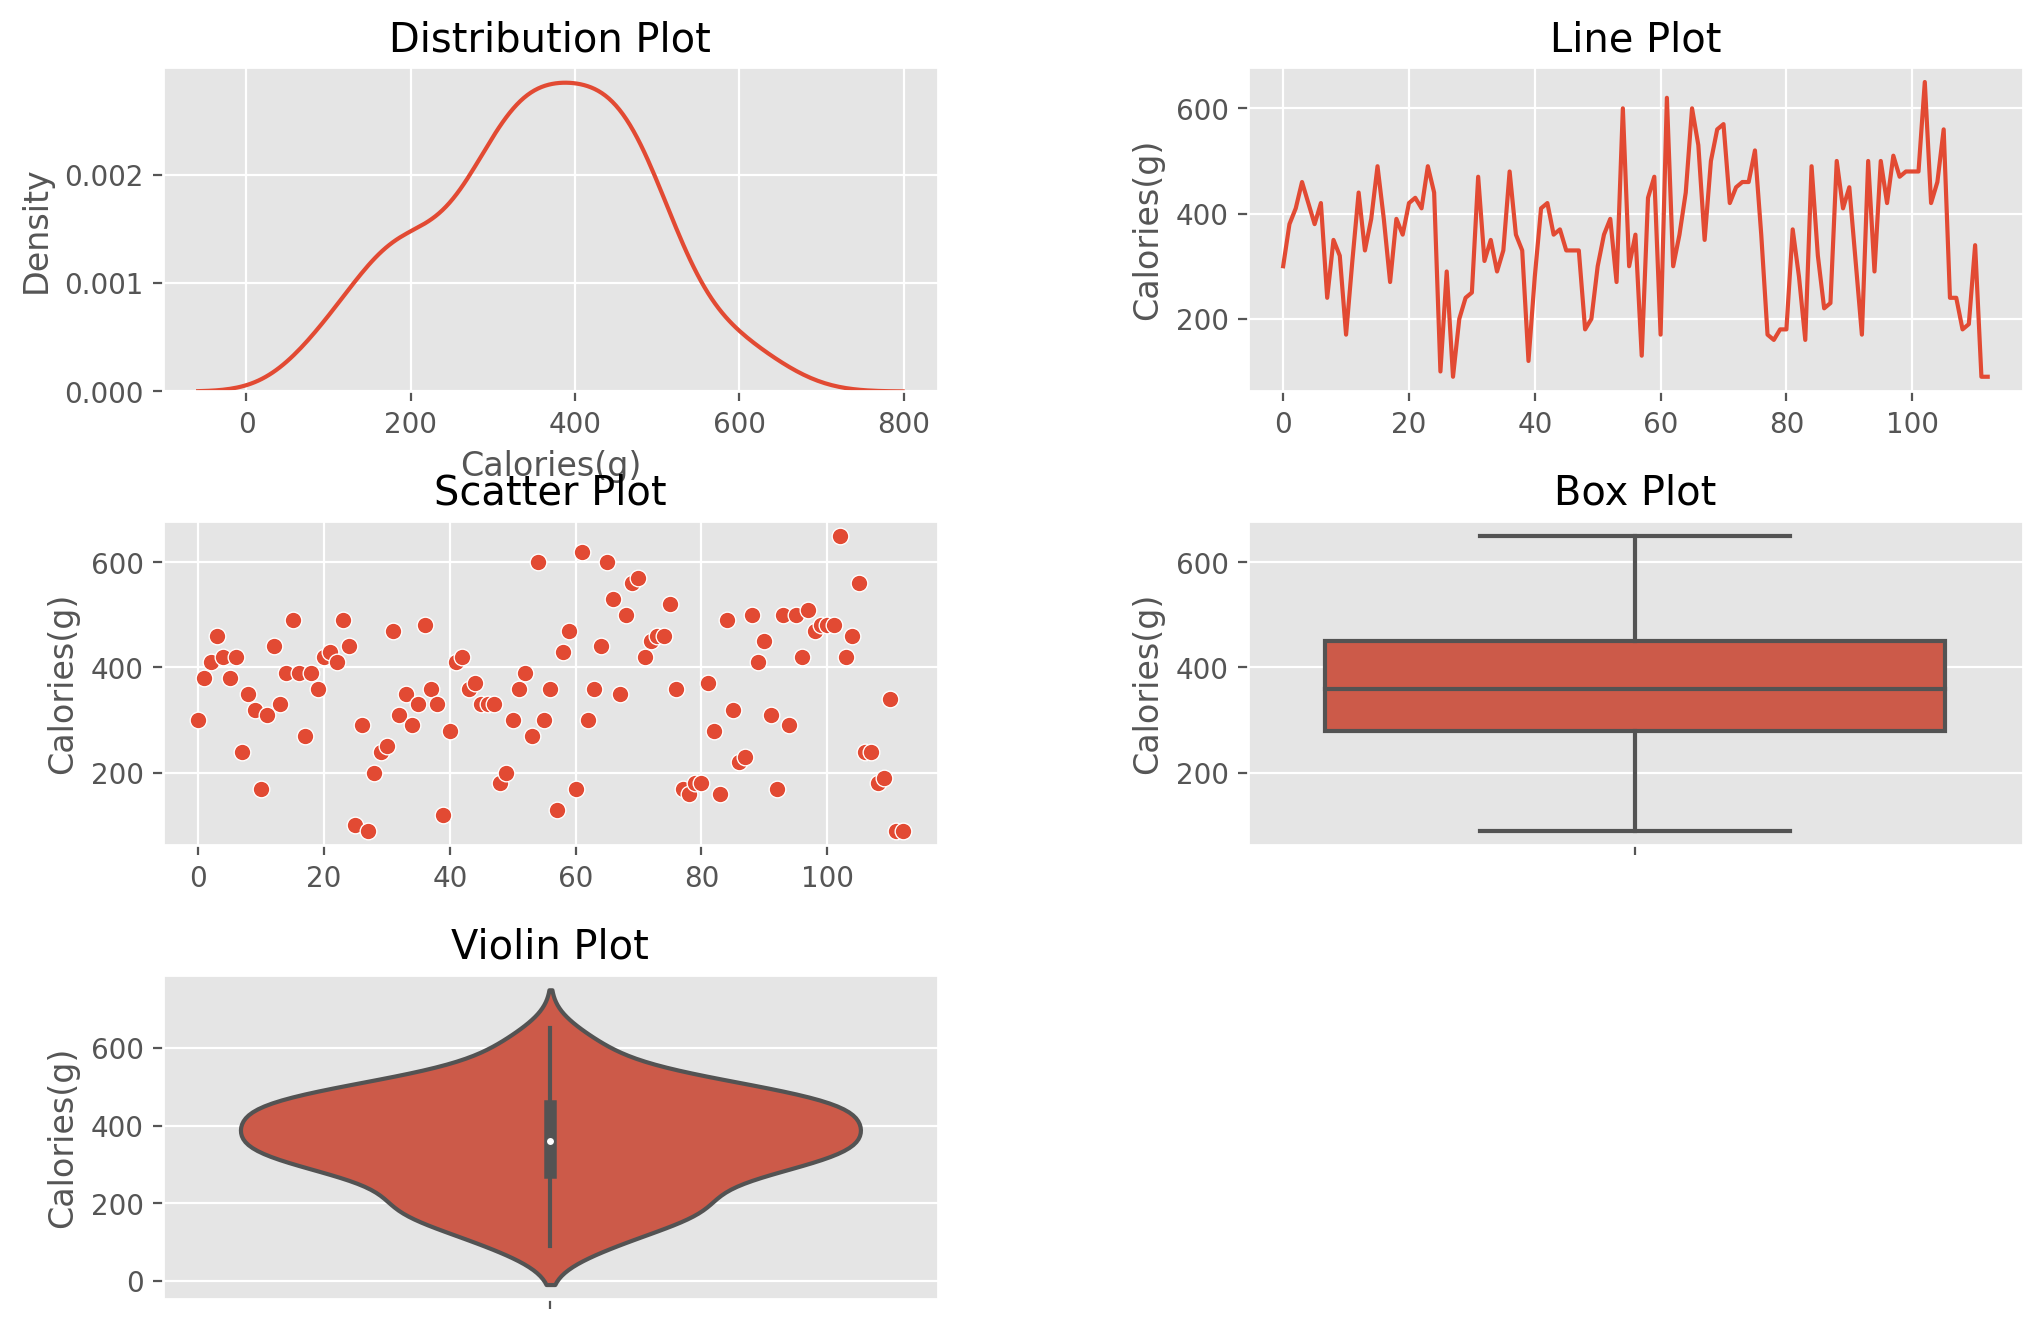

In [33]:
# Subplot 1 - Distribution plot
plt.figure(figsize= (12,8), dpi =200)

plt.subplot(3, 2, 1)
sns.distplot(nutrition_food['Calories(g)'], hist=False)
plt.title('Distribution Plot')

# Subplot 2 - Line plot
plt.subplot(3, 2, 2)
sns.lineplot(data=nutrition_food, x=nutrition_food.index, y='Calories(g)')
plt.title('Line Plot')

# Subplot 3 - Scatter plot
plt.subplot(3, 2, 3)
sns.scatterplot(data=nutrition_food, x=nutrition_food.index, y='Calories(g)')
plt.title('Scatter Plot')

# Subplot 4 - Box plot
plt.subplot(3, 2, 4)
sns.boxplot(y=nutrition_food['Calories(g)'])
plt.title('Box Plot')

# Subplot 5 - Violin plot
plt.subplot(3, 2, 5)
sns.violinplot(y=nutrition_food['Calories(g)'])
plt.title('Violin Plot')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
# Show the plots
plt.show()


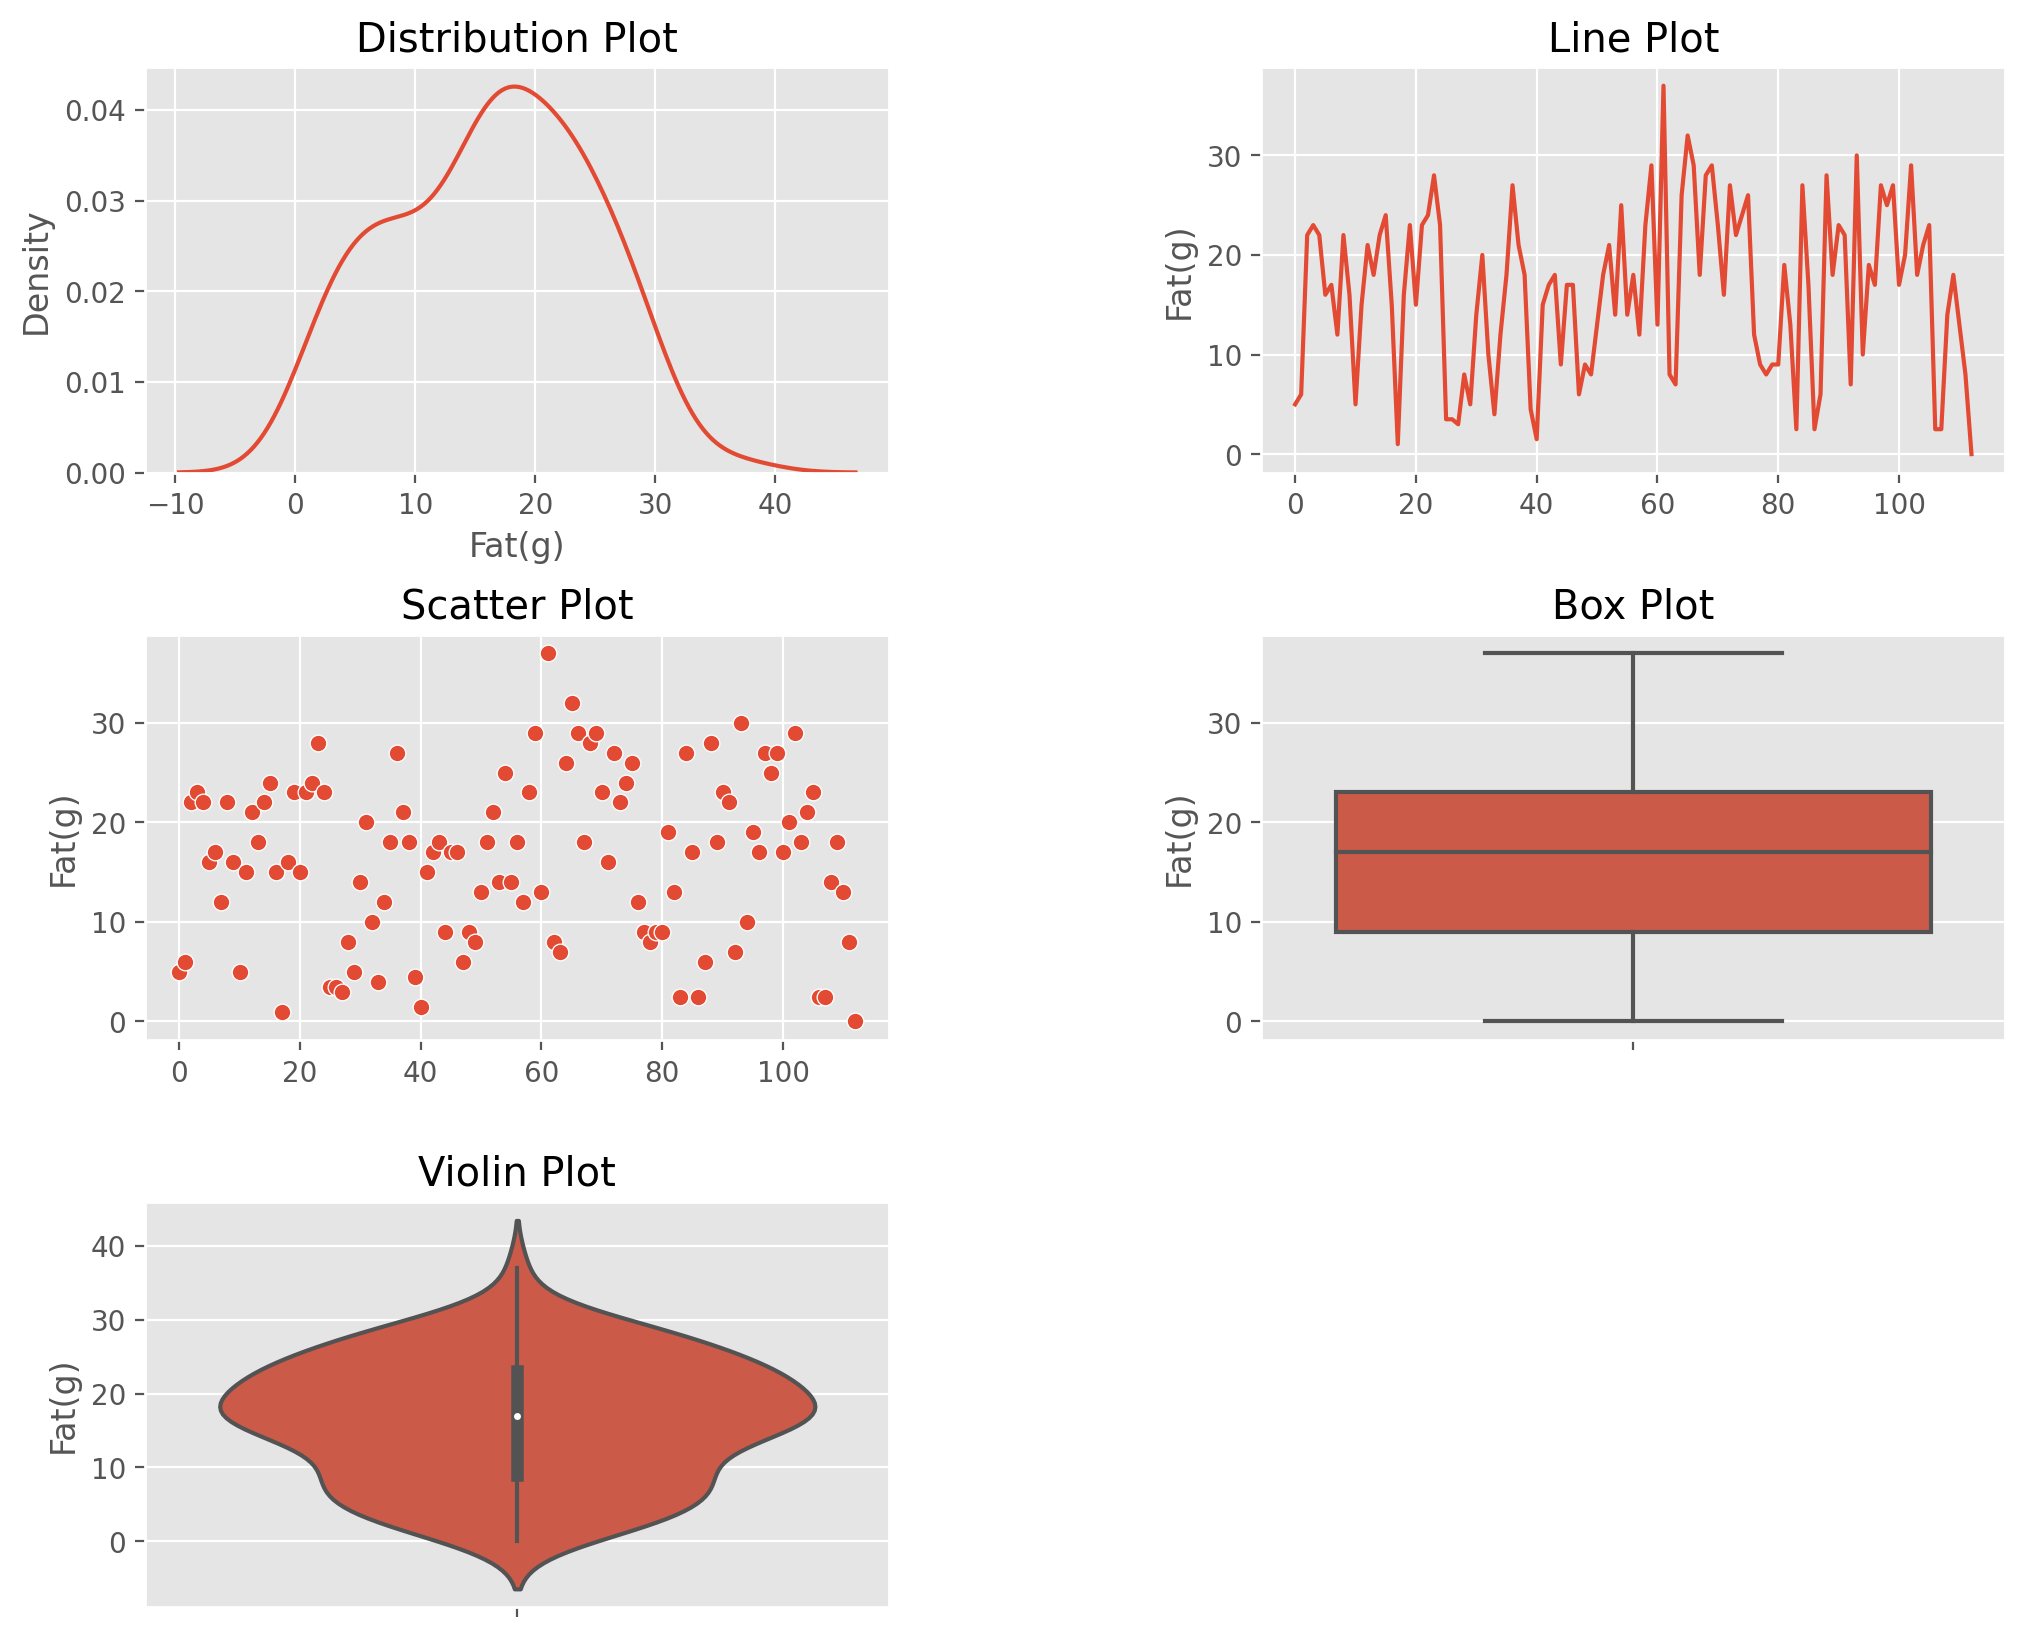

In [34]:
plt.figure(figsize=(12, 10), dpi=200)

# Subplot 1 - Distribution plot
plt.subplot(3, 2, 1)
sns.distplot(nutrition_food['Fat(g)'], hist=False)
plt.title('Distribution Plot')

# Subplot 2 - Line plot
plt.subplot(3, 2, 2)
sns.lineplot(data=nutrition_food, x=nutrition_food.index, y='Fat(g)')
plt.title('Line Plot')


# Subplot 3 - Scatter plot
plt.subplot(3, 2, 3)
sns.scatterplot(data=nutrition_food, x=nutrition_food.index, y='Fat(g)')
plt.title('Scatter Plot')

# Subplot 4 - Box plot
plt.subplot(3, 2, 4)
sns.boxplot(y=nutrition_food['Fat(g)'])
plt.title('Box Plot')


# Subplot 5 - Violin plot
plt.subplot(3, 2, 5)
sns.violinplot(y=nutrition_food['Fat(g)'])
plt.title('Violin Plot')
plt.subplots_adjust(wspace=0.5, hspace=0.4)

# Show the plots
plt.show()


### Bivariate

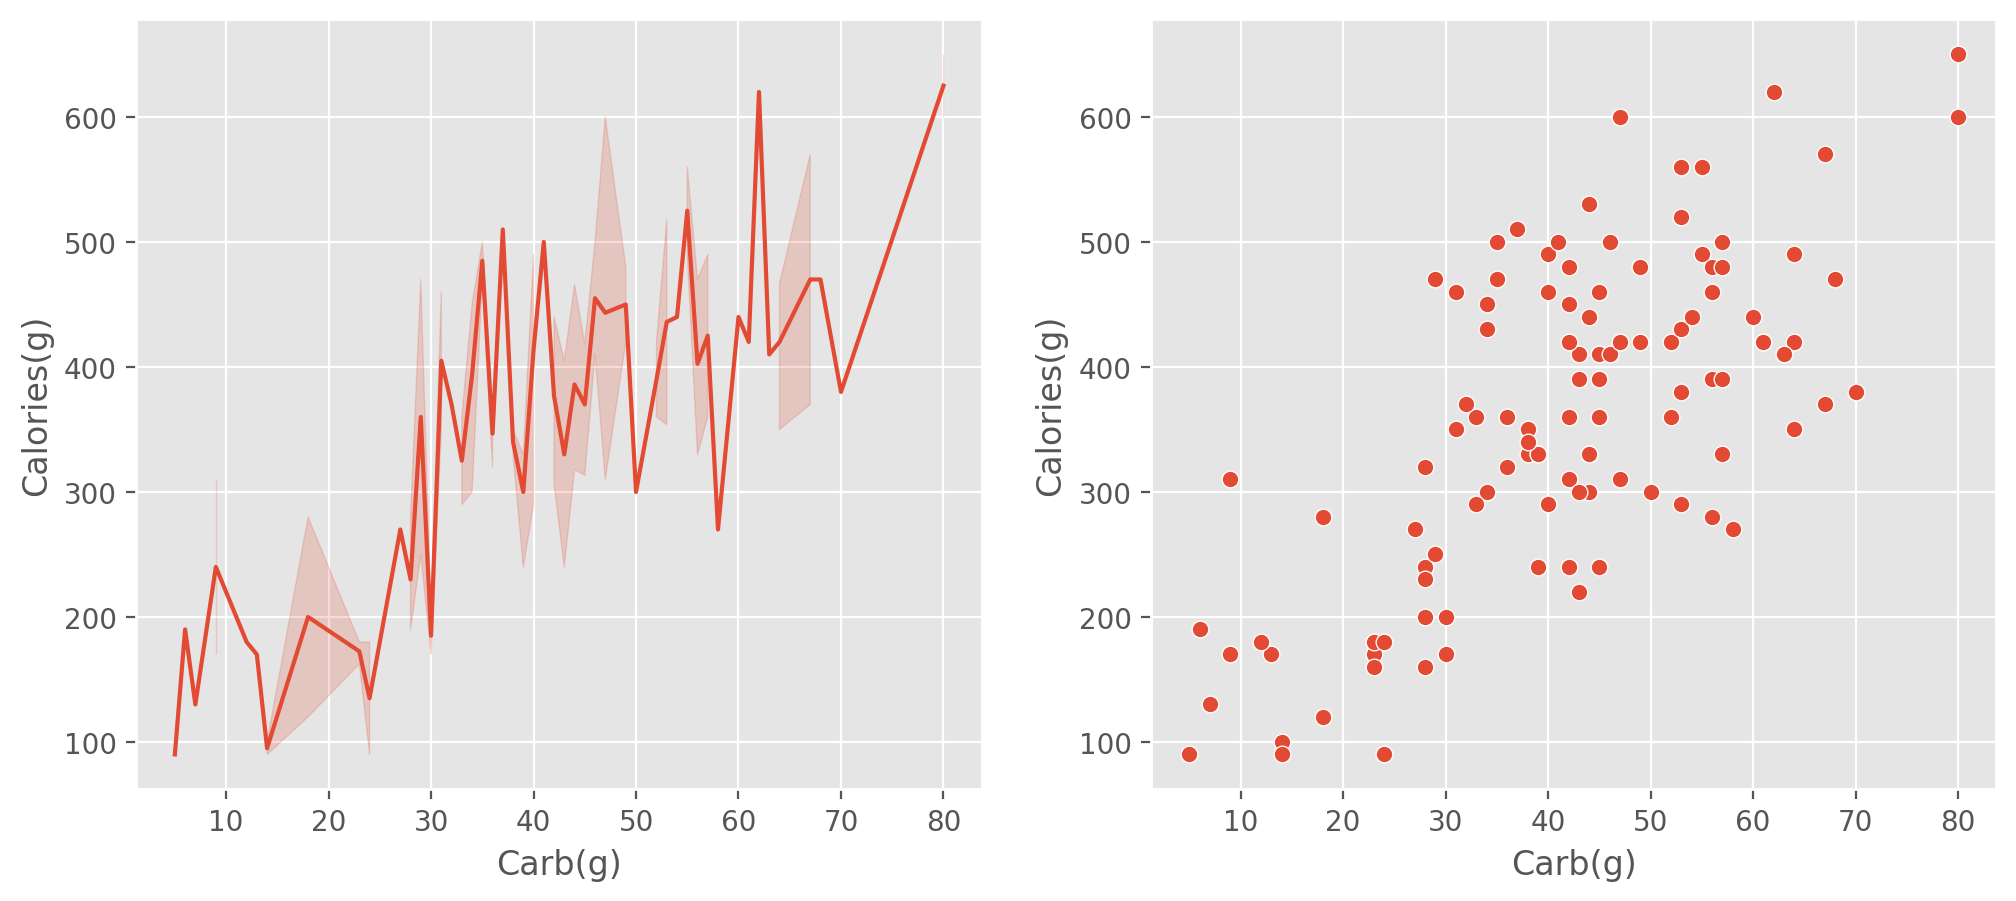

In [35]:
plt.figure(figsize = (12,5), dpi =200)
plt.subplot(1, 2, 1)
sns.lineplot(y=nutrition_food['Calories(g)'], x=nutrition_food['Carb(g)'])

plt.subplot(1, 2, 2)
sns.scatterplot(y=nutrition_food['Calories(g)'], x=nutrition_food['Carb(g)'])

# Show the plots
plt.show()



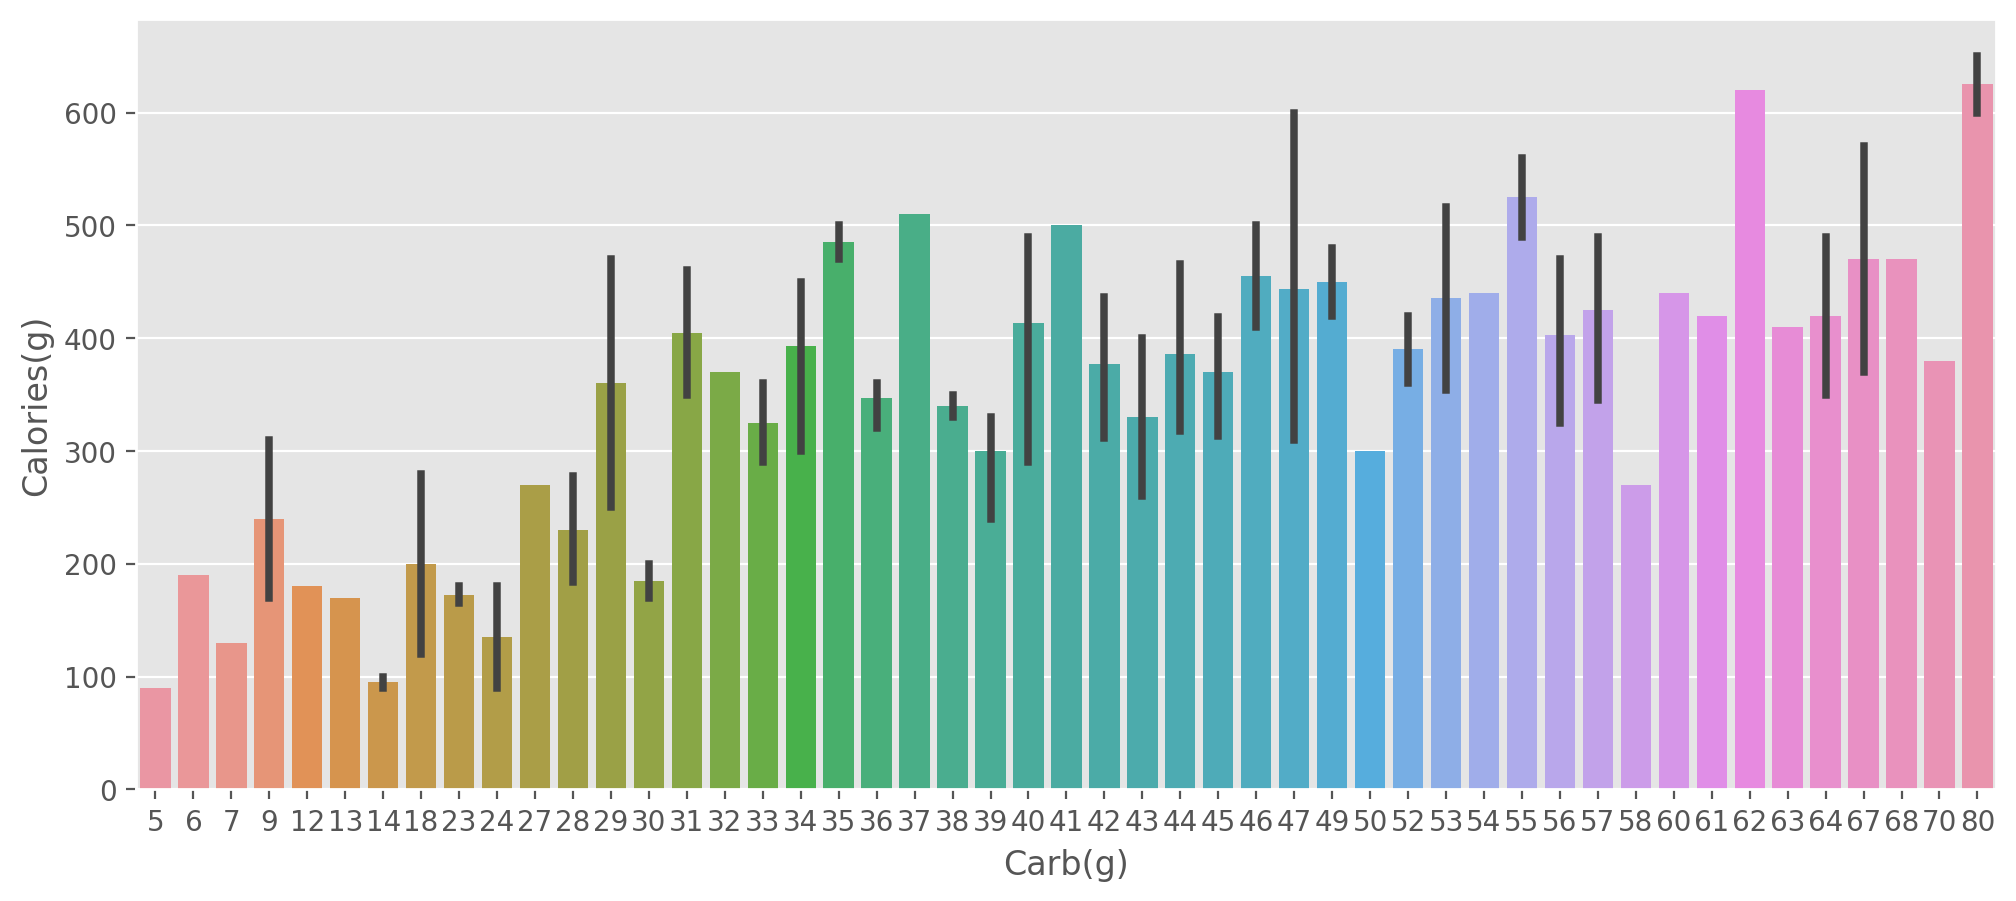

In [36]:
plt.figure(figsize = (12,5), dpi =200)
sns.barplot(y=nutrition_food['Calories(g)'], x=nutrition_food['Carb(g)'])

plt.show()



 carbs and calories are directly propotional.when carbs increases calories also inceases

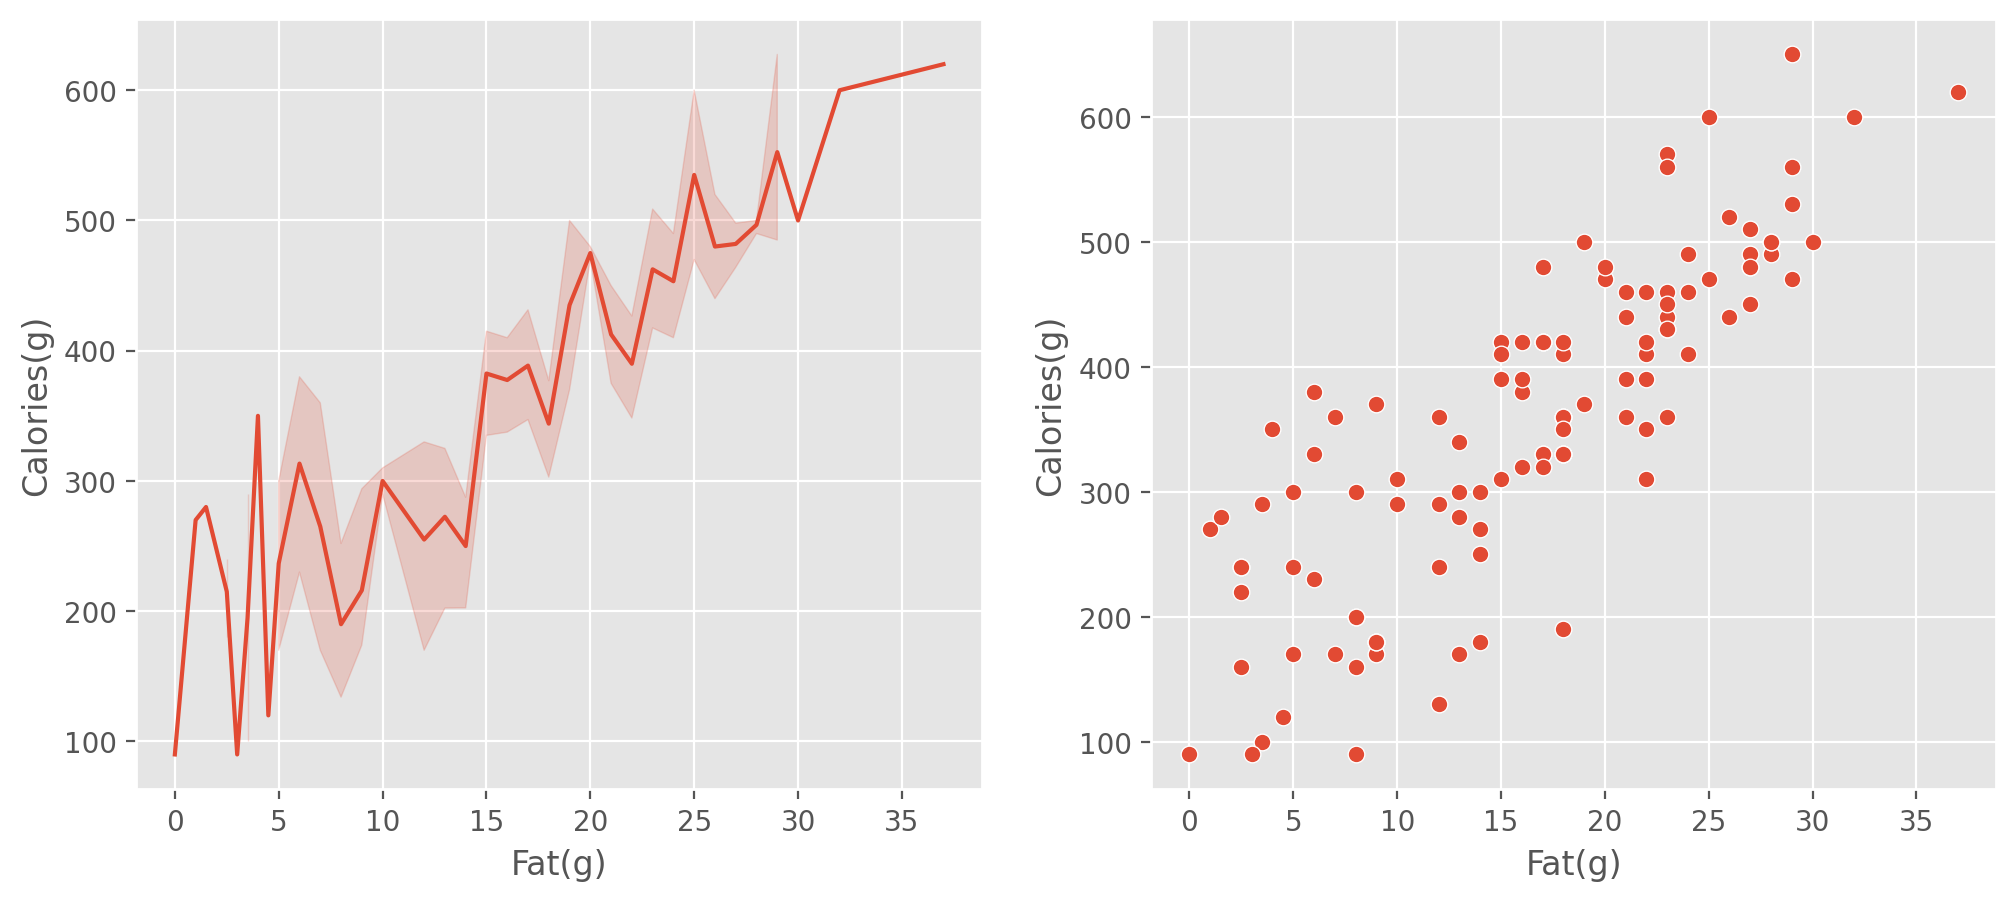

In [37]:
plt.figure(figsize = (12,5), dpi =200)
plt.subplot(1, 2, 1)
sns.lineplot(y=nutrition_food['Calories(g)'], x=nutrition_food['Fat(g)'])

plt.subplot(1, 2, 2)
sns.scatterplot(y=nutrition_food['Calories(g)'], x=nutrition_food['Fat(g)'])

# Show the plots
plt.show()

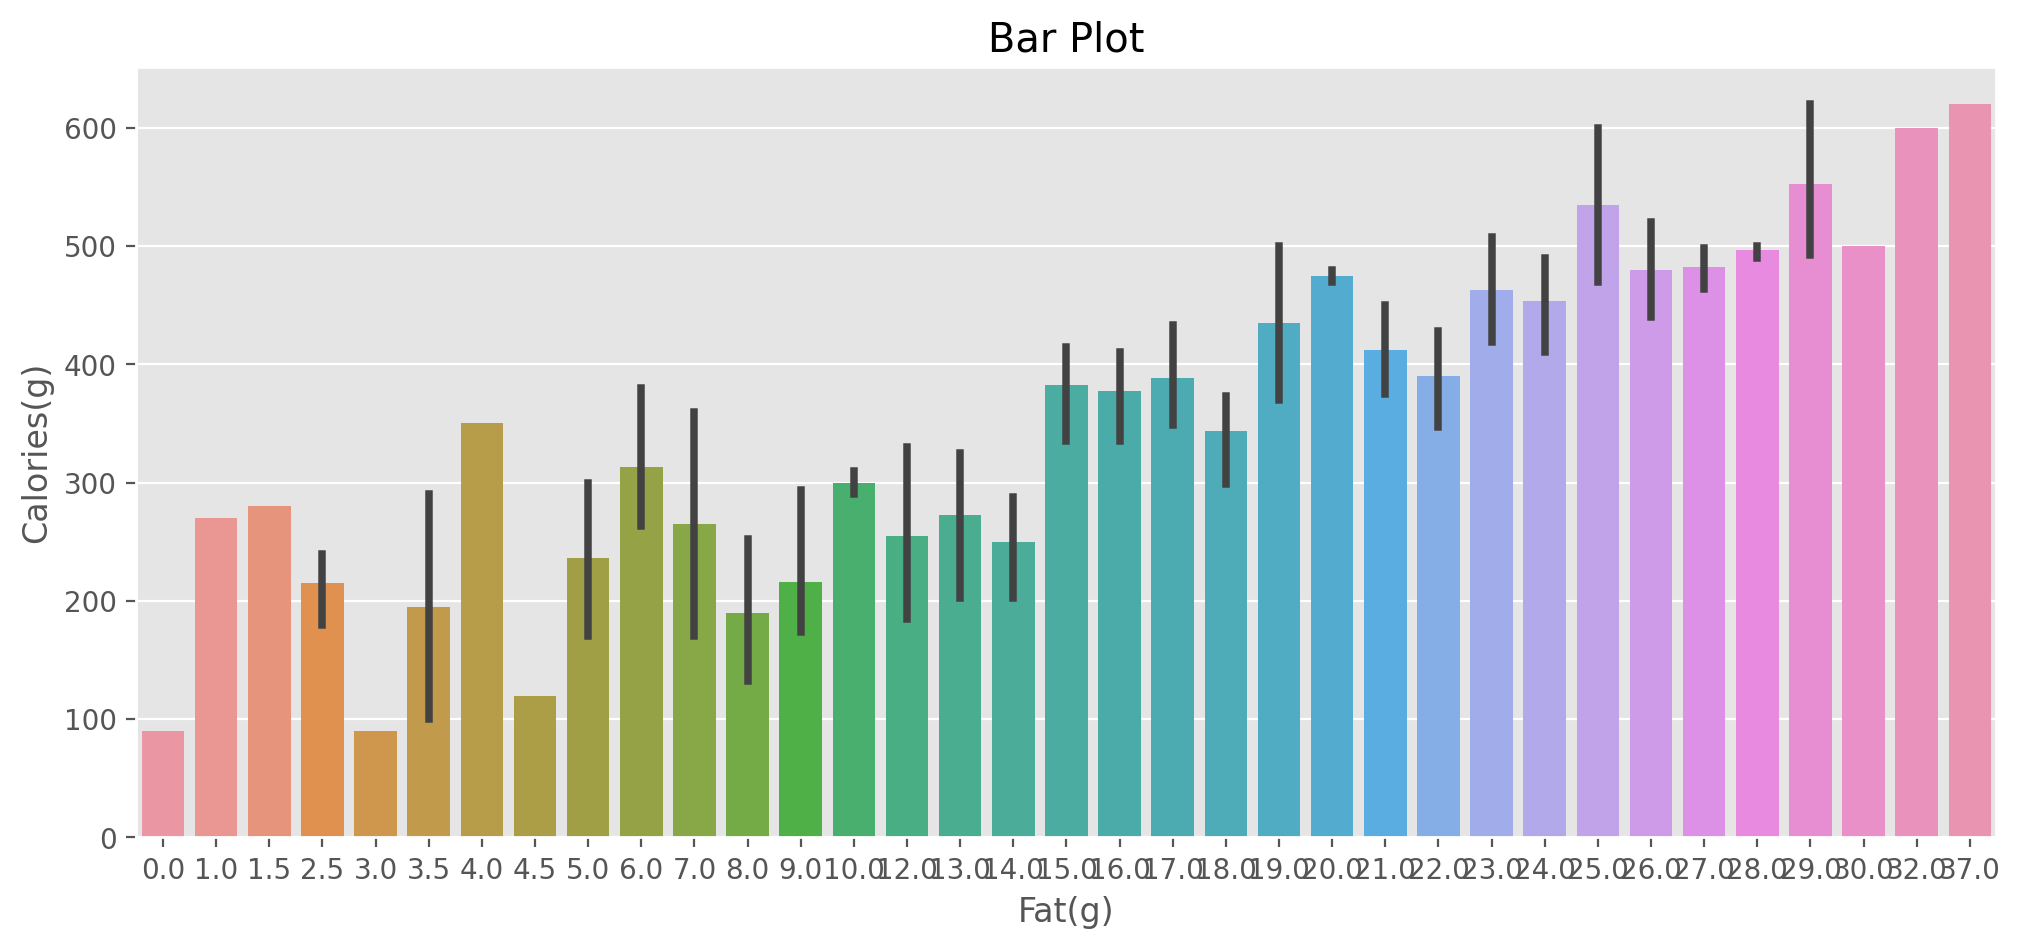

In [38]:
plt.figure(figsize=(12, 5), dpi=200)
sns.barplot(x=nutrition_food['Fat(g)'], y=nutrition_food['Calories(g)'])
plt.title('Bar Plot')

# Show the plot
plt.show()


In [39]:
when calories increases fat also increases.

SyntaxError: invalid syntax (3324323514.py, line 1)

In [ ]:
plt.figure(figsize = (12,5), dpi =200)
plt.subplot(1, 2, 1)
sns.lineplot(y=nutrition_food['Calories(g)'], x=nutrition_food['Fiber(g)'])

plt.subplot(1, 2, 2)
sns.scatterplot(y=nutrition_food['Calories(g)'], x=nutrition_food['Fiber(g)'])

# Show the plots
plt.show()


In [ ]:
plt.figure(figsize = (12,5), dpi =200)
plt.subplot(1, 2, 1)
sns.lineplot(y=nutrition_food['Calories(g)'], x=nutrition_food['Protein(g)'])

plt.subplot(1, 2, 2)
sns.scatterplot(y=nutrition_food['Calories(g)'], x=nutrition_food['Protein(g)'])

# Show the plots
plt.show()


1. Find high calorie food 

In [40]:
high_cal = nutrition_food[nutrition_food['Calories(g)'] == nutrition_food['Calories(g)'].max()]

high_cal

,Food_name,Calories(g),Fat(g),Carb(g),Fiber(g),Protein(g)
102,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23


In [41]:
high_carb = nutrition_food[nutrition_food['Carb(g)'] == nutrition_food['Carb(g)'].max()]

high_carb

,Food_name,Calories(g),Fat(g),Carb(g),Fiber(g),Protein(g)
54,Strawberries & Jam Sandwich,600,25.0,80,10,19
102,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23


In [42]:
high_fat = nutrition_food[nutrition_food['Fat(g)'] == nutrition_food['Fat(g)'].max()]

high_fat

,Food_name,Calories(g),Fat(g),Carb(g),Fiber(g),Protein(g)
61,Green Goddess Avocado Salad,620,37.0,62,10,13


In [43]:
high_fiber = nutrition_food[nutrition_food['Fiber(g)'] == nutrition_food['Fiber(g)'].max()]

high_fiber

,Food_name,Calories(g),Fat(g),Carb(g),Fiber(g),Protein(g)
102,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23


In [44]:
high_protein = nutrition_food[nutrition_food['Protein(g)'] == nutrition_food['Protein(g)'].max()]

high_protein

,Food_name,Calories(g),Fat(g),Carb(g),Fiber(g),Protein(g)
105,Turkey Pesto Panini,560,23.0,55,3,34


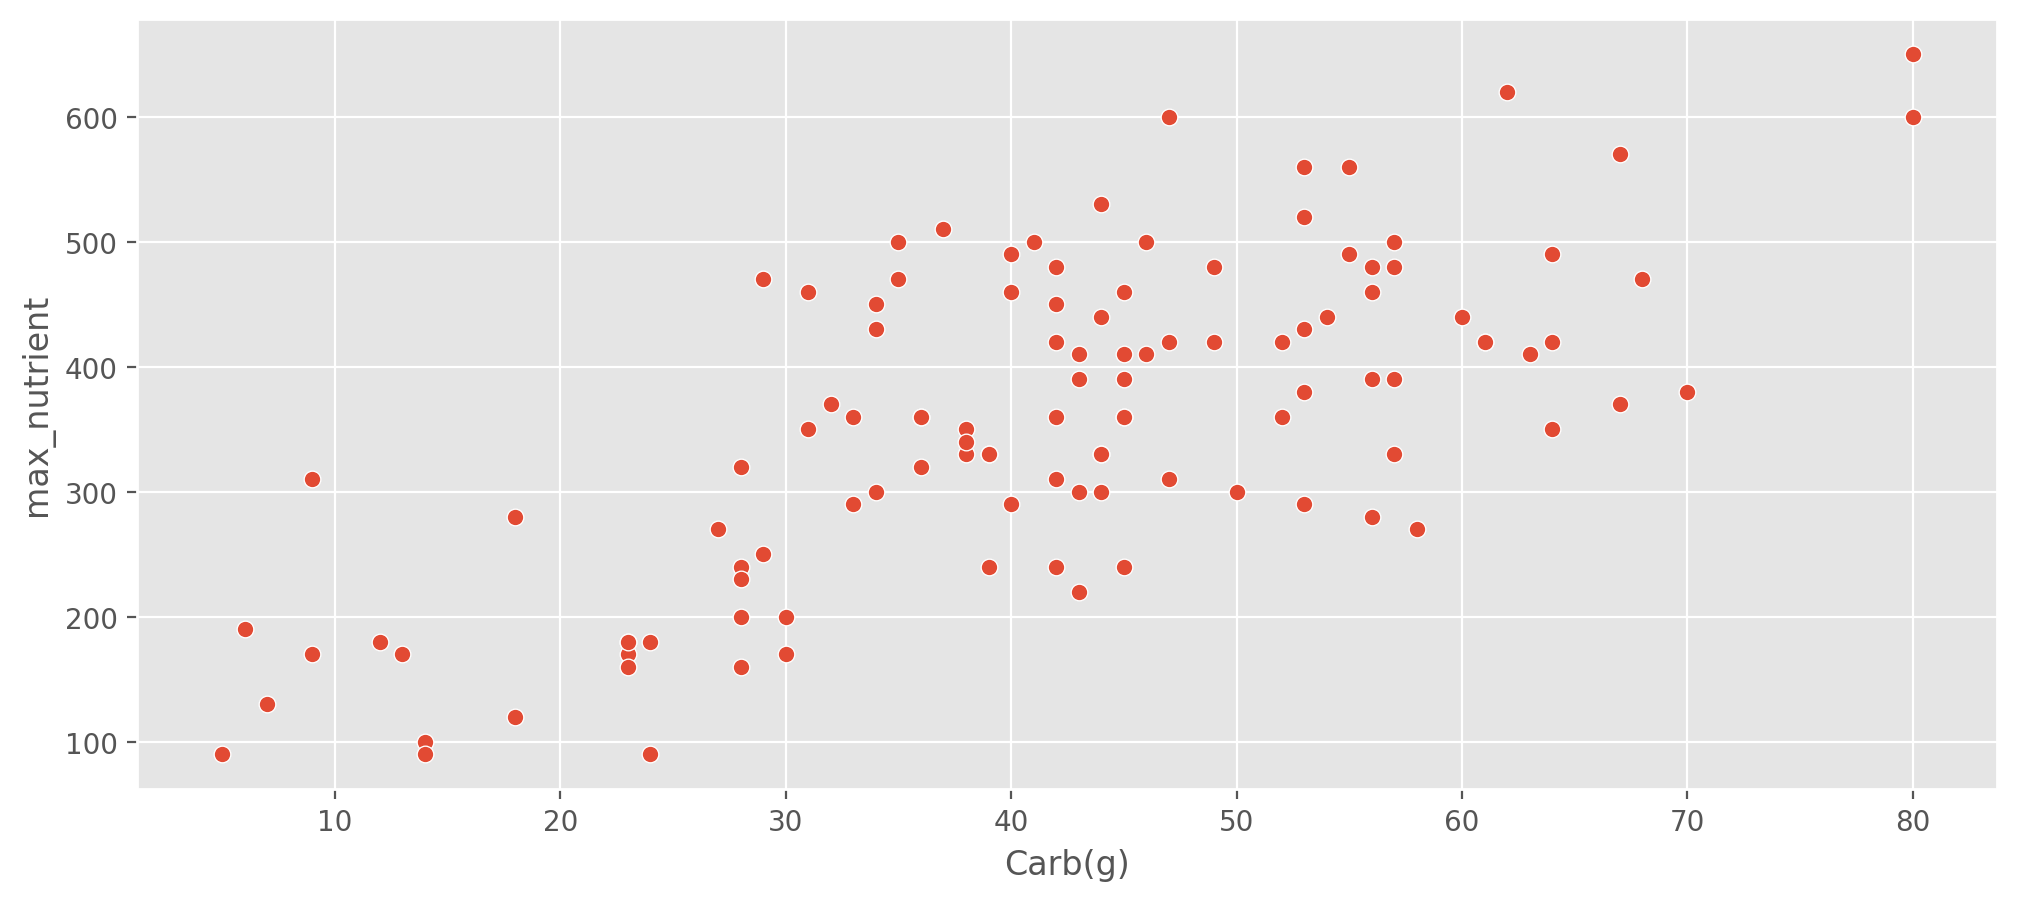

In [45]:
# Find the maximum value among nutrient columns for each row
nutrition_food['max_nutrient'] = nutrition_food[['Calories(g)', 'Fat(g)', 'Carb(g)', 'Fiber(g)', 'Protein(g)']].max(axis=1)

plt.figure(figsize=(12, 5), dpi=200)
sns.scatterplot(y='max_nutrient', x='Carb(g)', data=nutrition_food)
plt.show()

 when nutrients increases then  carbohytrates also increases.

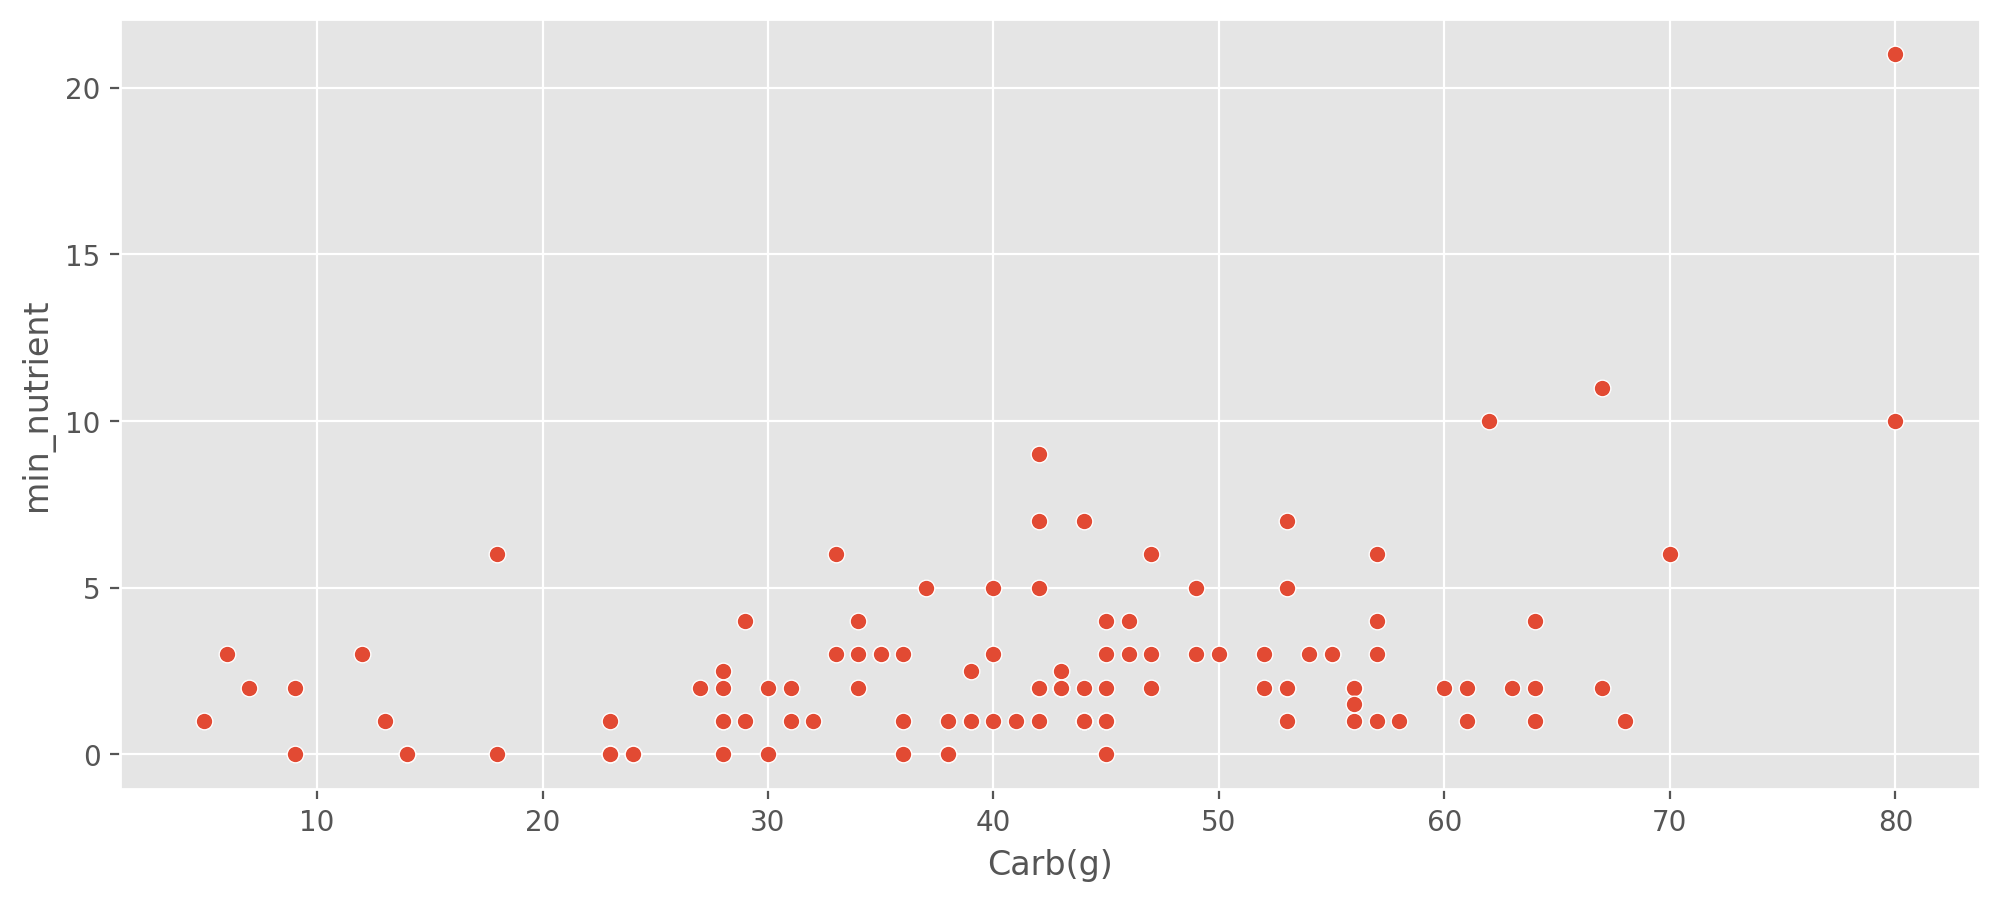

In [46]:
# Find the maximum value among nutrient columns for each row
nutrition_food['min_nutrient'] = nutrition_food[['Calories(g)', 'Fat(g)', 'Carb(g)', 'Fiber(g)', 'Protein(g)']].min(axis=1)

plt.figure(figsize=(12, 5), dpi=200)
sns.scatterplot(y='min_nutrient', x='Carb(g)', data=nutrition_food)
plt.show()

Minimum nutrient food have high carbohydrates in food.

In [47]:

nutrition_food = nutrition_food.sort_values(by='Calories(g)', ascending=False)

# Select the top 10 foods with the highest calorie content
top_10_high_calorie_foods = nutrition_food.head(10)

# Display the result
print(top_10_high_calorie_foods)

                                            Food_name  Calories(g)  Fat(g)  \
102  Lentils & Vegetable Protein Bowl with Brown Rice          650    29.0   
61                        Green Goddess Avocado Salad          620    37.0   
54                        Strawberries & Jam Sandwich          600    25.0   
65             Roasted Turkey & Dill Havarti Sandwich          600    32.0   
70               Za'atar Chicken & Lemon Tahini Salad          570    23.0   
105                               Turkey Pesto Panini          560    23.0   
69                   Turkey & Fire-Roasted Corn Salad          560    29.0   
66                    Seared Steak & Cheddar Sandwich          530    29.0   
75                                   PB&J Protein Box          520    26.0   
97       Chicken Artichoke on Ancient Grain Flatbread          510    27.0   

     Carb(g)  Fiber(g)  Protein(g)  max_nutrient  min_nutrient  
102       80        21          23         650.0          21.0  
61        6

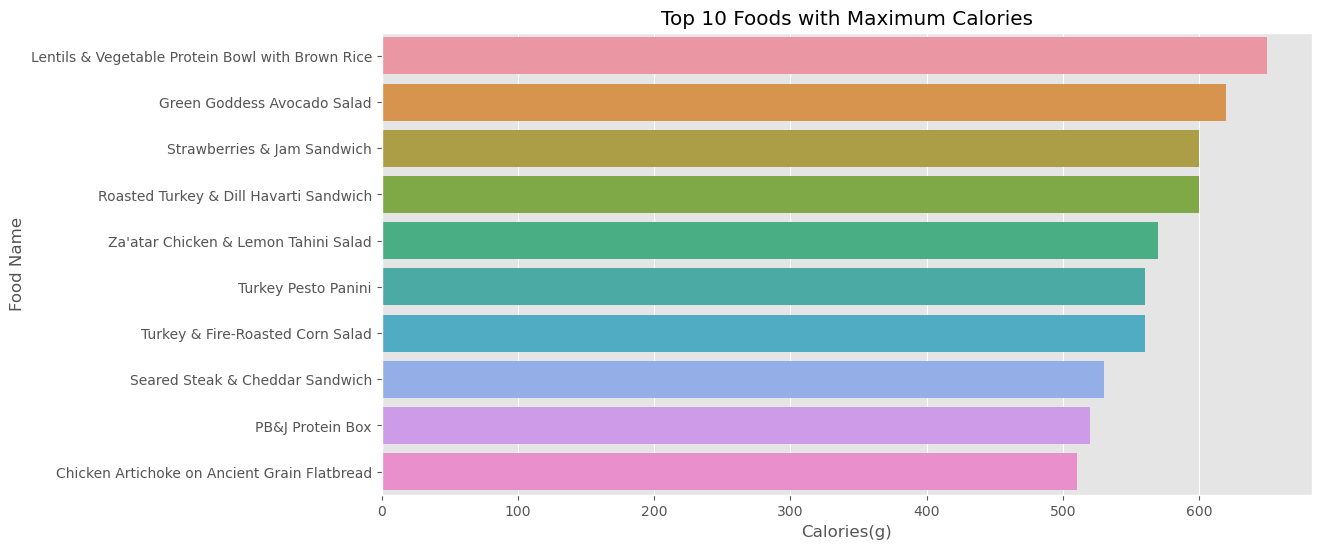

In [48]:


plt.figure(figsize=(12, 6))
sns.barplot(x='Calories(g)', y='Food_name', data=top_10_high_calorie_foods)
plt.title('Top 10 Foods with Maximum Calories')
plt.xlabel('Calories(g)')
plt.ylabel('Food Name')
plt.show()


In [49]:
cal_top10 = nutrition_food.sort_values(by='Calories(g)', ascending=False).head(10)
fat_top10 = nutrition_food.sort_values(by='Fat(g)', ascending=False).head(10)
carb_top10 = nutrition_food.sort_values(by='Carb(g)', ascending=False).head(10)
protein_top10 = nutrition_food.sort_values(by='Protein(g)', ascending=False).head(10)
fibre_top10 = nutrition_food.sort_values(by='Fiber(g)', ascending=False).head(10)

# Printing unique values in the 'Food_Name' column for each top 10 DataFrame
print("Top 10 high cal food:", cal_top10['Food_name'].unique())
print("Top 10 high fat food:", fat_top10['Food_name'].unique())
print("Top 10 high carb food:", carb_top10['Food_name'].unique())
print("Top 10 high protein food:", protein_top10['Food_name'].unique())
print("Top 10 high fiber food:", fibre_top10['Food_name'].unique())


Top 10 high cal food: ['Lentils & Vegetable Protein Bowl with Brown Rice'
 'Green Goddess Avocado Salad' 'Strawberries & Jam Sandwich'
 'Roasted Turkey & Dill Havarti Sandwich'
 "Za'atar Chicken & Lemon Tahini Salad" 'Turkey Pesto Panini'
 'Turkey & Fire-Roasted Corn Salad' 'Seared Steak & Cheddar Sandwich'
 'PB&J Protein Box' 'Chicken Artichoke on Ancient Grain Flatbread']
Top 10 high fat food: ['Green Goddess Avocado Salad' 'Roasted Turkey & Dill Havarti Sandwich'
 'Spicy Chorizo  Monterey Jack & Egg Breakfast Sandwich'
 'Lentils & Vegetable Protein Bowl with Brown Rice'
 "Farmers' Market Protein Box" 'Turkey & Fire-Roasted Corn Salad'
 'Seared Steak & Cheddar Sandwich' 'Double Chocolate Chunk Brownie'
 'Sausage Cheddar & Egg Breakfast Sandwich'
 'Smoked Mozzarella & Roasted Pepper Sandwich']
Top 10 high carb food: ['Lentils & Vegetable Protein Bowl with Brown Rice'
 'Strawberries & Jam Sandwich' '8-Grain Roll' 'Iced Lemon Pound Cake'
 "Za'atar Chicken & Lemon Tahini Salad"
 'Reduced

In [50]:
high_cal_mean = nutrition_food['Calories(g)'].mean()
high_fat_mean = nutrition_food['Fat(g)'].mean()

high_cal_high_fat_food = nutrition_food.loc[(nutrition_food['Calories(g)'] > high_cal_mean) & (nutrition_food['Fat(g)'] > high_fat_mean), 'Food_name']

print("Foods high in calories and fat:")
print(high_cal_high_fat_food.tolist())

Foods high in calories and fat:
['Lentils & Vegetable Protein Bowl with Brown Rice', 'Green Goddess Avocado Salad', 'Strawberries & Jam Sandwich', 'Roasted Turkey & Dill Havarti Sandwich', "Za'atar Chicken & Lemon Tahini Salad", 'Turkey Pesto Panini', 'Turkey & Fire-Roasted Corn Salad', 'Seared Steak & Cheddar Sandwich', 'PB&J Protein Box', 'Chicken Artichoke on Ancient Grain Flatbread', 'Smoked Mozzarella & Roasted Pepper Sandwich', 'Spicy Chorizo  Monterey Jack & Egg Breakfast Sandwich', 'Ancho Chipotle Chicken Panini ', 'Sausage Cheddar & Egg Breakfast Sandwich', 'Double Chocolate Chunk Brownie', 'Double-Smoked Bacon Cheddar & Egg Sandwich', 'Chocolate Marble Loaf Cake', 'Old-Fashioned Glazed Doughnut', 'Egg Salad Sandwich', 'Homestyle Chicken & Double-Smoked Bacon', 'Italian-Style Ham & Spicy Salami', "Farmers' Market Protein Box", 'Chicken BLT Salad Sandwich', 'Iced Lemon Pound Cake', 'Apple Fritter', 'Eggs & Cheese Protein Box', 'Turkey & Havarti Sandwich', 'Chicken Wrap Protein 

In [51]:
# Assuming 'nutrition_food' is your DataFrame
high_cal_mean = nutrition_food['Calories(g)'].mean()
high_fat_mean = nutrition_food['Fat(g)'].mean()

high_cal_food = nutrition_food.loc[nutrition_food['Calories(g)'] > high_cal_mean, 'Food_name']
high_fat_food = nutrition_food.loc[nutrition_food['Fat(g)'] > high_fat_mean, 'Food_name']

common_high_cal_high_fat_food = set(high_cal_food) & set(high_fat_food)





Top 10 Common foods high in calories and fat: ['Chicken Wrap Protein Box', 'Cubano Sandwich', 'Slow-Roasted Ham Swiss & Egg Breakfast Sandwich', 'Double Chocolate Brownie', 'Bacon Gouda & Egg Breakfast Sandwich', 'Turkey & Havarti Sandwich', 'Seared Steak Egg & Tomatillo Wrap', 'Chocolate Hazelnut Croissant', 'Cookie Butter Bar', 'Smoked Mozzarella & Roasted Pepper Sandwich']


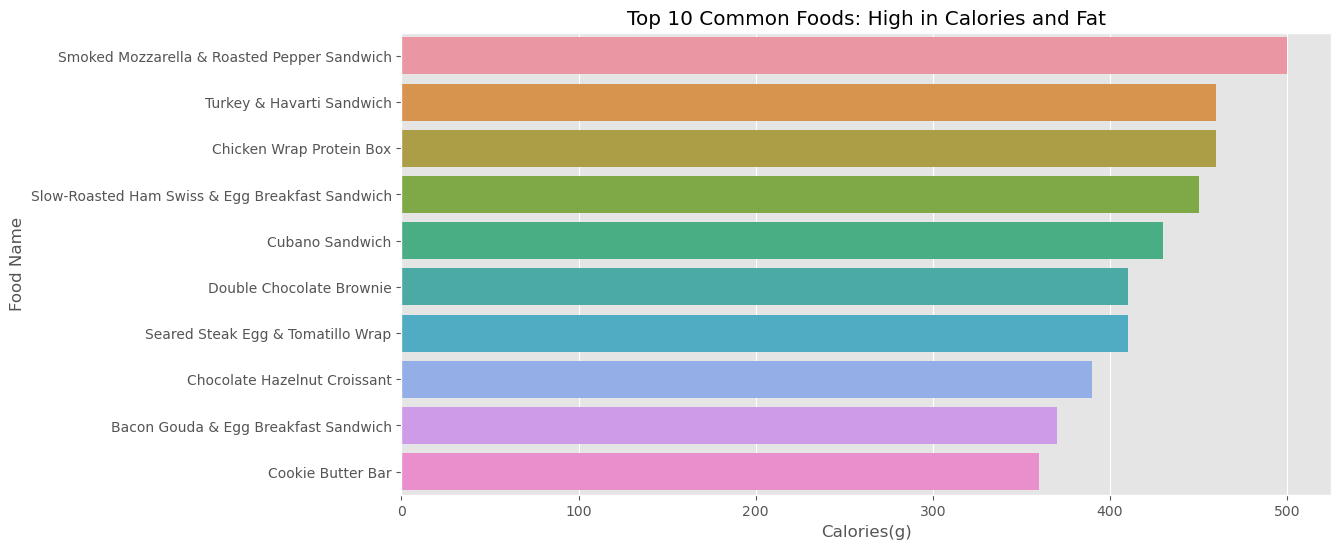

In [52]:


# Assuming 'nutrition_food' is your DataFrame
high_cal_mean = nutrition_food['Calories(g)'].mean()
high_fat_mean = nutrition_food['Fat(g)'].mean()

high_cal_food = nutrition_food.loc[nutrition_food['Calories(g)'] > high_cal_mean, 'Food_name']
high_fat_food = nutrition_food.loc[nutrition_food['Fat(g)'] > high_fat_mean, 'Food_name']

common_high_cal_high_fat_food = set(high_cal_food) & set(high_fat_food)

# Select top 10 common foods
top_10_common_high_cal_high_fat_food = list(common_high_cal_high_fat_food)[:10]

# Display the top 10 common foods
print("Top 10 Common foods high in calories and fat:", top_10_common_high_cal_high_fat_food)

# Plot the top 10 common foods
plt.figure(figsize=(12, 6))
sns.barplot(x='Calories(g)', y='Food_name', data=nutrition_food[nutrition_food['Food_name'].isin(top_10_common_high_cal_high_fat_food)])
plt.title('Top 10 Common Foods: High in Calories and Fat')
plt.xlabel('Calories(g)')
plt.ylabel('Food Name')
plt.show()


 high fat and high calorie foods  which is not to be  suggested for elder ones  , and it is not suggested to eat at night

In [53]:
nutrition_food.calories         = nutrition_food[['Food_name','Calories(g)']]
nutrition_food.calories.columns = ['Food_name', 'Calories(g)']
nutrition_food.calories

,Food_name,Calories(g)
102,Lentils & Vegetable Protein Bowl with Brown Rice,650
61,Green Goddess Avocado Salad,620
54,Strawberries & Jam Sandwich,600
65,Roasted Turkey & Dill Havarti Sandwich,600
70,Za'atar Chicken & Lemon Tahini Salad,570
...,...,...
39,Petite Vanilla Bean Scone,120
25,Everybody's Favorite - Bantam Bagel (2 Pack),100
27,Frappuccino® Cookie Straw,90
111,Organic Avocado (Spread),90


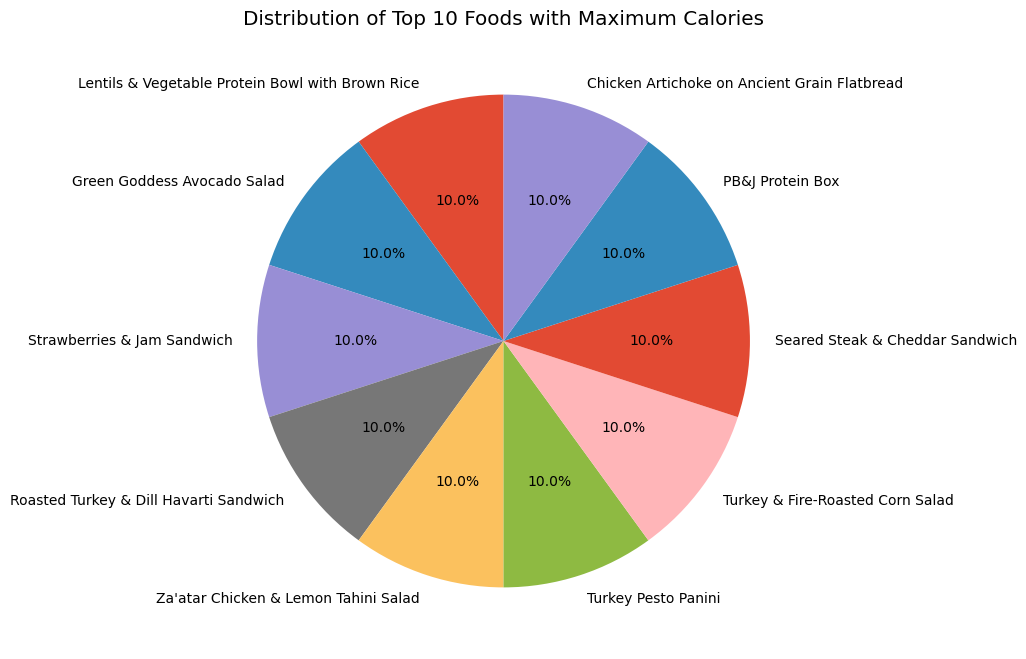

In [54]:


# Find the top 10 foods based on maximum calories
top_10_max_calories = nutrition_food.nlargest(10, 'Calories(g)')

# Calculate the distribution of food in each category (Food_name)
category_counts = top_10_max_calories['Food_name'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 10 Foods with Maximum Calories')
plt.show()


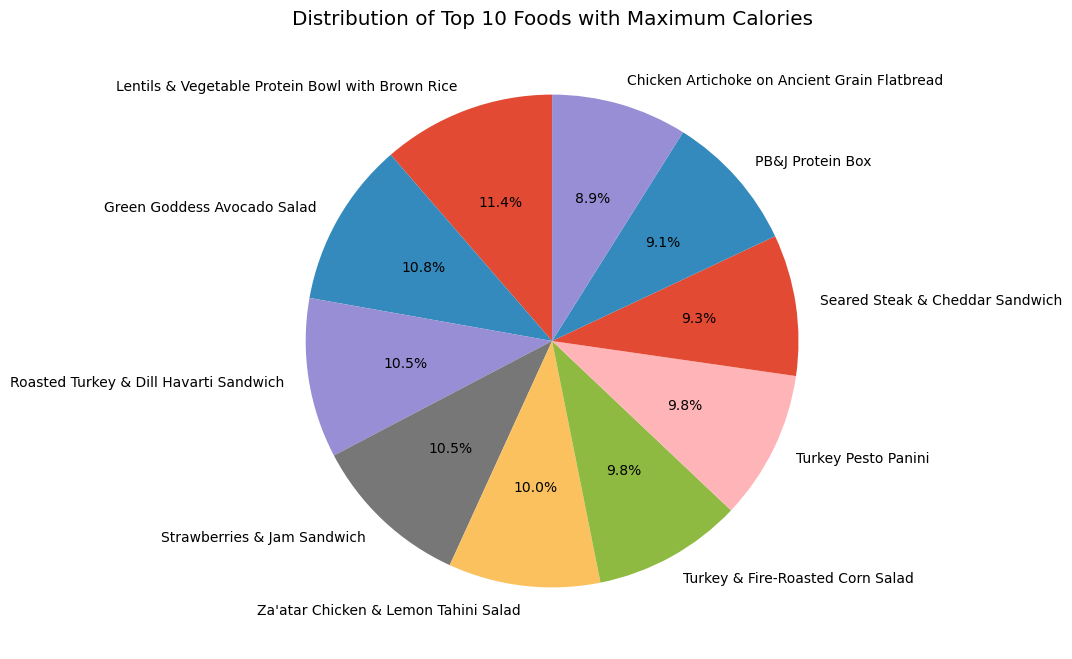

In [55]:

# Group by 'Food_name' and find the top 10 foods based on maximum calories
top_10_max_calories = nutrition_food.groupby('Food_name')['Calories(g)'].max().nlargest(10)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_max_calories, labels=top_10_max_calories.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 10 Foods with Maximum Calories')
plt.show()


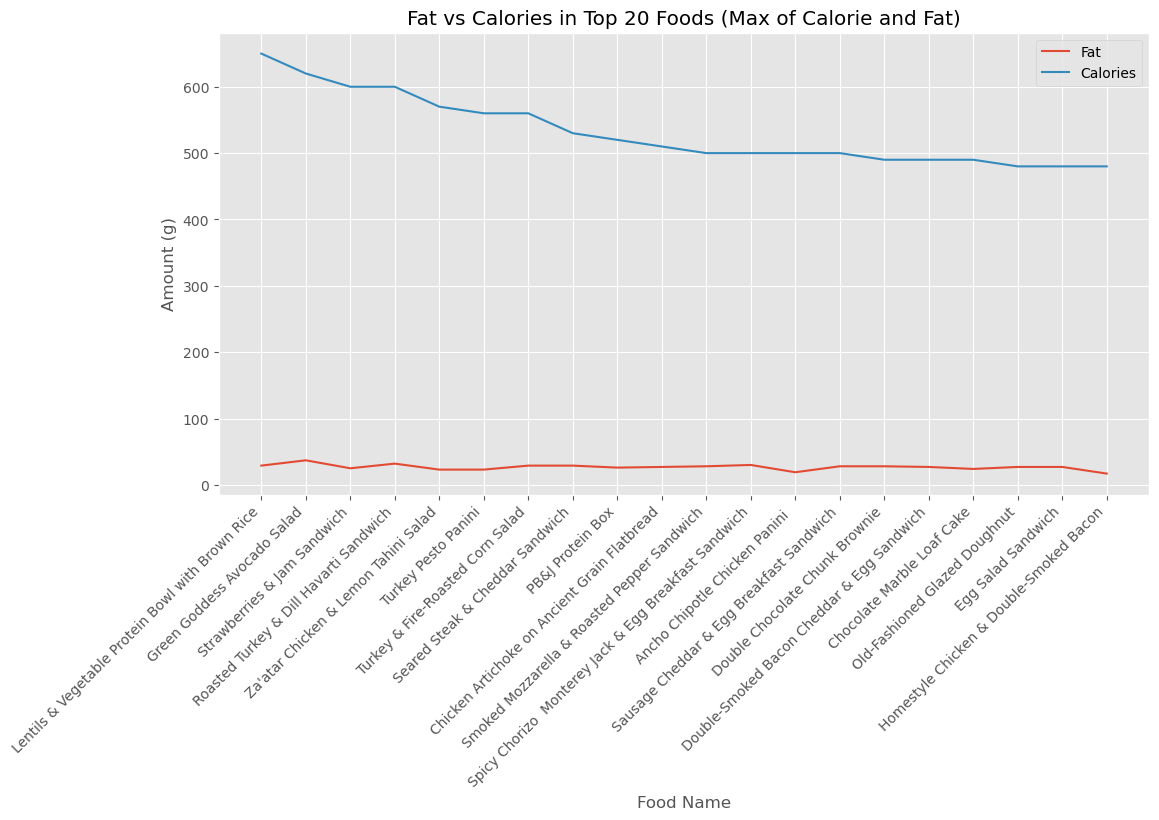

In [56]:

# Create a new column with the maximum of 'Calories(g)' and 'Fat(g)' for each food
nutrition_food['Max_Calorie_Fat'] = np.maximum(nutrition_food['Calories(g)'], nutrition_food['Fat(g)'])

# Select the top 20 foods based on the maximum of 'Calories(g)' and 'Fat(g)'
top_20_foods = nutrition_food.nlargest(20, 'Max_Calorie_Fat')

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for fat and calorie content
sns.lineplot(x='Food_name', y='Fat(g)', data=top_20_foods, label='Fat')
sns.lineplot(x='Food_name', y='Calories(g)', data=top_20_foods, label='Calories')

plt.title('Fat vs Calories in Top 20 Foods (Max of Calorie and Fat)')
plt.xlabel('Food Name')
plt.ylabel('Amount (g)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()


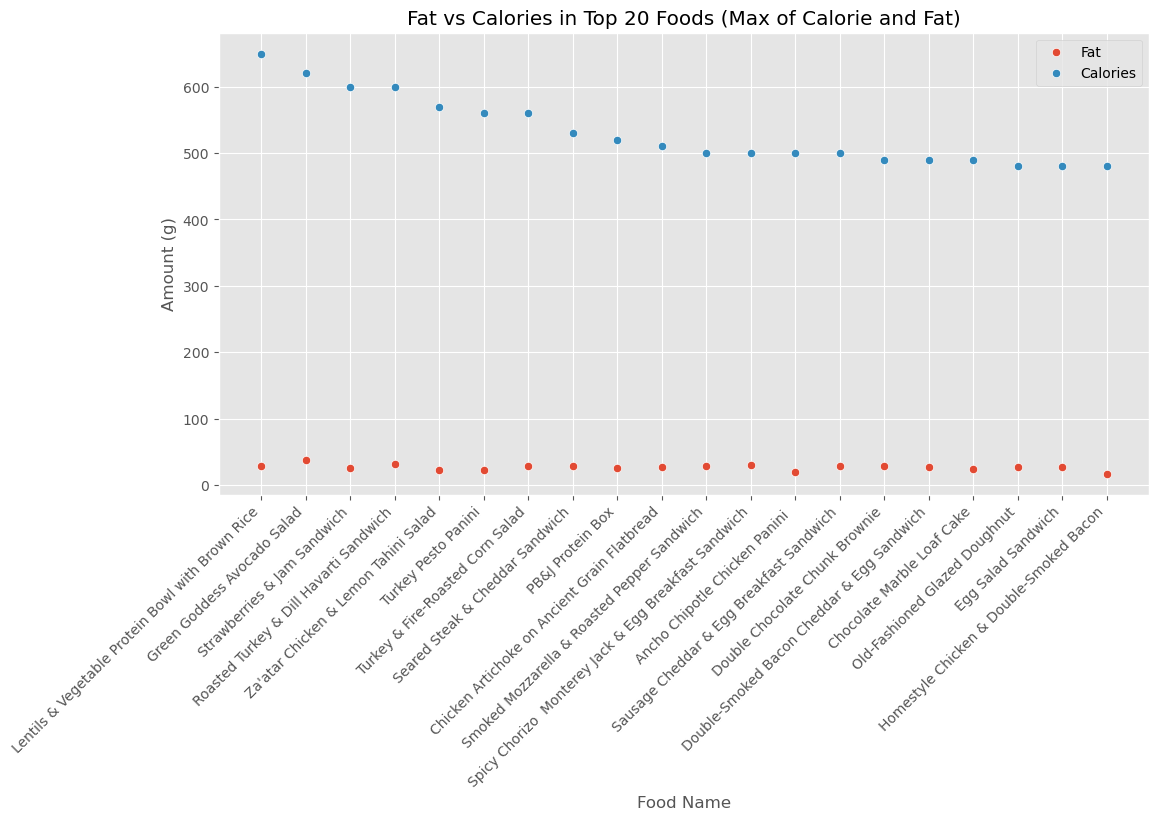

In [57]:

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for fat and calorie content
sns.scatterplot(x='Food_name', y='Fat(g)', data=top_20_foods, label='Fat')
sns.scatterplot(x='Food_name', y='Calories(g)', data=top_20_foods, label='Calories')

plt.title('Fat vs Calories in Top 20 Foods (Max of Calorie and Fat)')
plt.xlabel('Food Name')
plt.ylabel('Amount (g)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()


therefore we can conclude Fat food calories are high